Búsqueda de Videos

In [2]:
# Install isodate library
!pip install isodate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.0 MB/s eta 0:00:00


In [89]:
from google.colab import drive
import pandas as pd
import isodate
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
file_path =  '/content/drive/MyDrive/PAECIS Grupo 13/youtube_comments_with_flags_and_replies_new.csv'

In [7]:
comentarios = pd.read_csv(file_path)

# Display the first few rows of the dataframe to confirm it loaded correctly
comentarios.head()

,comment_id,comment,user_id,user_name,comment_time,comment_likes,total_reply_count,is_top_level_comment,video_title,channel_title,video_published_at,video_views,video_likes,video_duration,relacion_evento,evento,tipo_evento,condiciones_cuenta
0,UgyEy8OvhoFZrm5GJdd4AaABAg,Cuanto tiempo?,UCAHJ7ysRA9VnBb7JsHBcYPQ,@Raul-bb3nc,2024-05-18T04:07:18Z,0.0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628058.0,23636,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
1,UgwHEuRpsRRYPMdUIgl4AaABAg,DEMENTE,UCpkOnRIXHKSxUTB_o670KUQ,@DanielaMagnetto,2024-05-10T15:27:31Z,0.0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628058.0,23636,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
2,UgxwuSoMHOuFhLJq6HR4AaABAg,Metete las remeras y los gorros en el Q lo 😂,UCpkOnRIXHKSxUTB_o670KUQ,@DanielaMagnetto,2024-05-10T15:11:56Z,0.0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628058.0,23636,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
3,UgycBcRrtu-sx9tHI-N4AaABAg,Que hermoso querido presidente.,UC3a1y33-3H-9J4MEq-fnh8g,@JojoRD-1023,2024-05-04T00:24:26Z,0.0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628058.0,23636,PT41M21S,No,Primer paro nacional,Desfavorable,A favor
4,UgwYAvyfqDyz7Aj1kA54AaABAg,Con que pago el avion,UCGcFFZunCnsLrZOcorrB6mQ,@susanaramon3592,2024-04-29T01:19:14Z,0.0,0,True,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,2024-01-26T12:00:37Z,628058.0,23636,PT41M21S,No,Primer paro nacional,Desfavorable,A favor


In [9]:
# Convert 'total_reply_count' and 'video_likes' to numeric
comentarios['total_reply_count'] = pd.to_numeric(comentarios['total_reply_count'], errors='coerce')
comentarios['video_likes'] = pd.to_numeric(comentarios['video_likes'], errors='coerce')

In [10]:
comentarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56537 entries, 0 to 56536
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   comment_id            56537 non-null  object 
 1   comment               56512 non-null  object 
 2   user_id               56500 non-null  object 
 3   user_name             56450 non-null  object 
 4   comment_time          56500 non-null  object 
 5   comment_likes         56500 non-null  float64
 6   total_reply_count     56488 non-null  float64
 7   is_top_level_comment  56500 non-null  object 
 8   video_title           56500 non-null  object 
 9   channel_title         56500 non-null  object 
 10  video_published_at    56500 non-null  object 
 11  video_views           56500 non-null  float64
 12  video_likes           56488 non-null  float64
 13  video_duration        56500 non-null  object 
 14  relacion_evento       56500 non-null  object 
 15  evento             

In [50]:
# Remove rows where 'user_id' is null
comentarios_cleaned = comentarios.dropna(subset=['user_id'])

In [51]:
# List of channel titles to keep
channels_to_keep = ['El Peluca Milei', 'Infobae', 'LA NACION', 'Pais De Boludos']

# Filter the DataFrame to keep only the rows where 'channel_title' is in the list
comentarios_filtered = comentarios_cleaned[comentarios_cleaned['channel_title'].isin(channels_to_keep)]


In [52]:
# Define a function to convert ISO 8601 duration to a timedelta
def convert_iso8601_to_timedelta(iso_duration):
    return isodate.parse_duration(iso_duration)

In [14]:
# Ensure that the DataFrame is not a view of another DataFrame
comentarios_filtered_time = comentarios_filtered.copy()

# Convert the 'video_duration' column
comentarios_filtered_time.loc[:, 'duration_timedelta'] = comentarios_filtered_time['video_duration'].apply(convert_iso8601_to_timedelta)

# Optional: Convert the timedelta to total seconds (or any other format you prefer)
comentarios_filtered_time.loc[:, 'duration_seconds'] = comentarios_filtered_time['duration_timedelta'].apply(lambda x: x.total_seconds())

# Delete the original 'video_duration' column
comentarios_filtered_time.drop(columns=['video_duration'], inplace=True)


In [15]:
# Convert 'comment_time' and 'video_published_at' to datetime
comentarios_filtered_time['comment_time'] = pd.to_datetime(comentarios_filtered_time['comment_time'])
comentarios_filtered_time['video_published_at'] = pd.to_datetime(comentarios_filtered_time['video_published_at'])


In [31]:
# Save the combined DataFrame to a CSV file with UTF-8 encoding
comentarios_filtered_time.to_csv('youtube_comments_with_cleaned_ts.csv', index=False, encoding='utf-8')

In [64]:
comentarios_filtered_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56488 entries, 0 to 56536
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype              
---  ------                --------------  -----              
 0   comment_id            56488 non-null  object             
 1   comment               56488 non-null  object             
 2   user_id               56488 non-null  object             
 3   user_name             56438 non-null  object             
 4   comment_time          56488 non-null  datetime64[ns, UTC]
 5   comment_likes         56488 non-null  float64            
 6   total_reply_count     56488 non-null  float64            
 7   is_top_level_comment  56488 non-null  object             
 8   video_title           56488 non-null  object             
 9   channel_title         56488 non-null  object             
 10  video_published_at    56488 non-null  datetime64[ns, UTC]
 11  video_views           56488 non-null  float64            
 12  video_lik

In [63]:
comentarios_filtered_time.describe()

,comment_likes,total_reply_count,video_views,video_likes,duration_timedelta,duration_seconds
count,56488.000000,56488.000000,56488.000000,56488.000000,56488,56488.000000
mean,5.952397,0.383480,334515.770836,14669.342126,0 days 00:40:53.387905395,2453.387905
std,40.953573,3.659792,217135.230115,10579.776944,0 days 00:22:01.333238937,1321.333239
min,0.000000,0.000000,866.000000,20.000000,0 days 00:00:32,32.000000
25%,0.000000,0.000000,150887.000000,5853.000000,0 days 00:26:04,1564.000000
50%,0.000000,0.000000,349638.000000,12882.000000,0 days 00:41:21,2481.000000
75%,1.000000,0.000000,604128.000000,22261.000000,0 days 00:54:49,3289.000000
max,2358.000000,329.000000,628058.000000,34299.000000,0 days 03:24:25,12265.000000


In [65]:
distinct_counts = pd.DataFrame({
    'user_id_count': comentarios_filtered_time['user_id'].nunique(),
    'video_title_count': comentarios_filtered_time['video_title'].nunique(),
    'evento_count': comentarios_filtered_time['evento'].nunique(),
    'channel_title_count': comentarios_filtered_time['channel_title'].nunique()
}, index=[0])

# Display the counts
distinct_counts

,user_id_count,video_title_count,evento_count,channel_title_count
0,33997,88,12,4


In [71]:
# Grouping by video_title and channel_title and counting comments
comments_by_video = comentarios_filtered_time.groupby(['video_title', 'channel_title', 'evento']).size().reset_index(name='comment_count')


In [72]:
comments_by_video_ordered = comments_by_video.sort_values(by='comment_count', ascending=False)
comments_by_video_ordered.head(10)

,video_title,channel_title,evento,comment_count
50,MILEI DESTROZÓ A LA MUJER DEL PRESIDENTE EN ES...,El Peluca Milei,Crisis diplomatica España,6721
60,MILEI SE CRUZÓ MAL CON PERIODISTA QUE NO PARÓ ...,El Peluca Milei,Primer paro nacional,5256
53,MILEI ESTALLÓ EN ESPAÑA EN PLENA PRESENTACIÓN ...,El Peluca Milei,Crisis diplomatica España,3321
57,MILEI HIZO ESTALLAR A JONATAN VIALE TRAS LOS E...,El Peluca Milei,Crisis alimentos Capital Humano,3083
9,CONCIERTO HISTÓRICO DE MILEI ANTE UN ESTADIO C...,El Peluca Milei,Presentación de libro,2802
51,MILEI DIO EL DISCURSO DE SU VIDA ANTE TODOS EM...,El Peluca Milei,24 de marzo,2655
54,MILEI ESTALLÓ ESPAÑA EN PLENA ENTREGA DE PREMIO,El Peluca Milei,24 de marzo,2621
49,MILEI A LOS GRITOS EN MITRE TRAS EL ESCÁNDALO ...,El Peluca Milei,Crisis alimentos Capital Humano,2352
58,MILEI LE CERRÓ LA BOCA A PERIODISTA QUE LE CUE...,El Peluca Milei,Aprobación total Ley bases,2219
67,"Milei, tras la aprobación de la Ley Bases: ""E...",LA NACION,Aprobación total Ley bases,2036


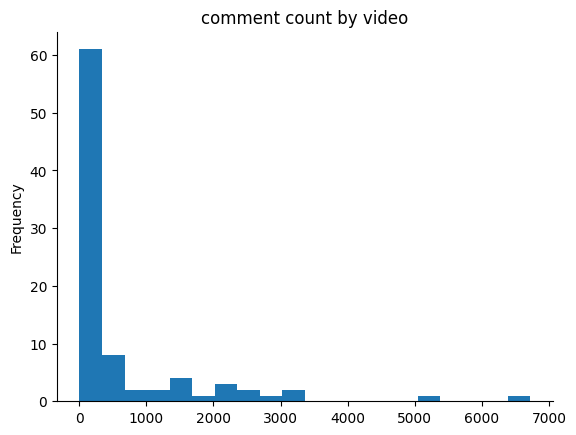

In [73]:
comments_by_video['comment_count'].plot(kind='hist', bins=20, title='comment count by video')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [20]:
comments_by_channel = comentarios_filtered_time.groupby('channel_title').size().reset_index(name='comment_count')
comments_by_channel

,channel_title,comment_count
0,El Peluca Milei,36925
1,Infobae,73
2,LA NACION,16639
3,Pais De Boludos,2851


In [21]:
comments_by_event_type = comentarios_filtered_time.groupby('tipo_evento').size().reset_index(name='comment_count')

In [22]:
comments_by_event_type

,tipo_evento,comment_count
0,Desfavorable,32728
1,Favorable,14216
2,Neutral,9544


In [74]:
comments_by_event = comentarios_filtered_time.groupby(['tipo_evento', 'evento']).size().reset_index(name='comment_count')
comments_by_event_ordered = comments_by_event.sort_values(by='comment_count', ascending=False)

In [75]:
comments_by_event_ordered

,tipo_evento,evento,comment_count
1,Desfavorable,Crisis diplomatica España,12955
3,Desfavorable,Primer paro nacional,7497
0,Desfavorable,Crisis alimentos Capital Humano,7328
4,Favorable,Aprobación total Ley bases,6412
9,Neutral,24 de marzo,5540
2,Desfavorable,Marcha federal universitaria,4948
6,Favorable,Presentación de libro,4733
10,Neutral,25 de mayo,3155
7,Favorable,Reunion con Elon Musk,2585
8,Neutral,20 de junio,748


In [78]:
comments_by_user = comentarios_filtered_time.groupby(['user_name', 'user_id']).size().reset_index(name='comment_count')

comments_by_user_ordered = comments_by_user.sort_values(by='comment_count', ascending=False)
comments_by_user_ordered.head(20)

,user_name,user_id,comment_count
10993,@daphnyhealoregon2596,UCvepJg-HHV0Ev9m3sLPNpIA,78
12019,@eduardouncos1508,UC4XnpYtpqWlv1mLfxUY4dgg,72
18206,@josemarcelo4961,UCxFU1gqdkhEgAPnCUZI4dQQ,70
2905,@KrateoZ,UCK93cY2NJ9cTmVnYQAmQEgg,59
9017,@carloscorrea2293,UCfJDNbt4LJ5eiD57-PdkplA,54
19897,@leonardoiglesias2394,UCKBW-hWuHxF-DBsnCtFmToQ,53
27922,@ricardosantiagoritru7699,UCnu_ZICb134Bw3-omQajsww,52
27473,@ramoneduardo-xu4zg,UCoTR7ZzX5PNAMN5XW0iaOwg,49
26245,@otto8738,UC4GOnCbkNBNKz35TjCg0GBA,49
13960,@finezza636,UCk36VMZikePntKdGm3Ct4Fg,47


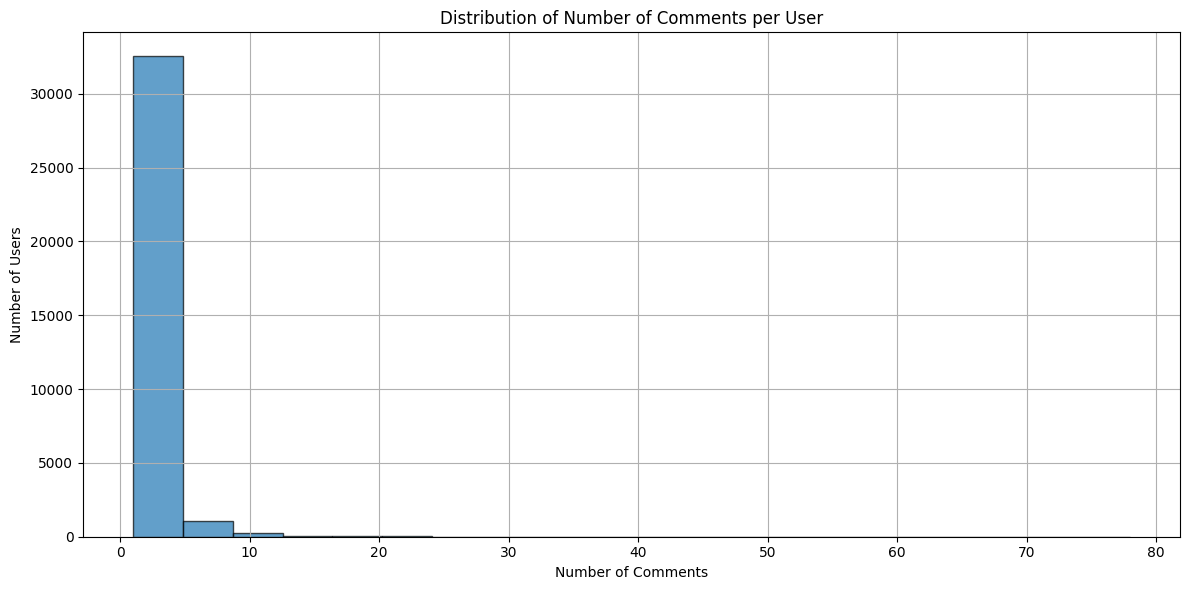

In [26]:
# Group by user_id and count the number of comments
comments_by_user = comentarios_filtered_time.groupby('user_id').size().reset_index(name='comment_count')

# Sort users by the number of comments in descending order
comments_by_user_ordered = comments_by_user.sort_values(by='comment_count', ascending=False)

# Plotting histogram
plt.figure(figsize=(12, 6))
plt.hist(comments_by_user_ordered['comment_count'], bins=20, edgecolor='black', alpha=0.7)
plt.title('Distribution of Number of Comments per User')
plt.xlabel('Number of Comments')
plt.ylabel('Number of Users')
plt.grid(True)
plt.tight_layout()
plt.show()

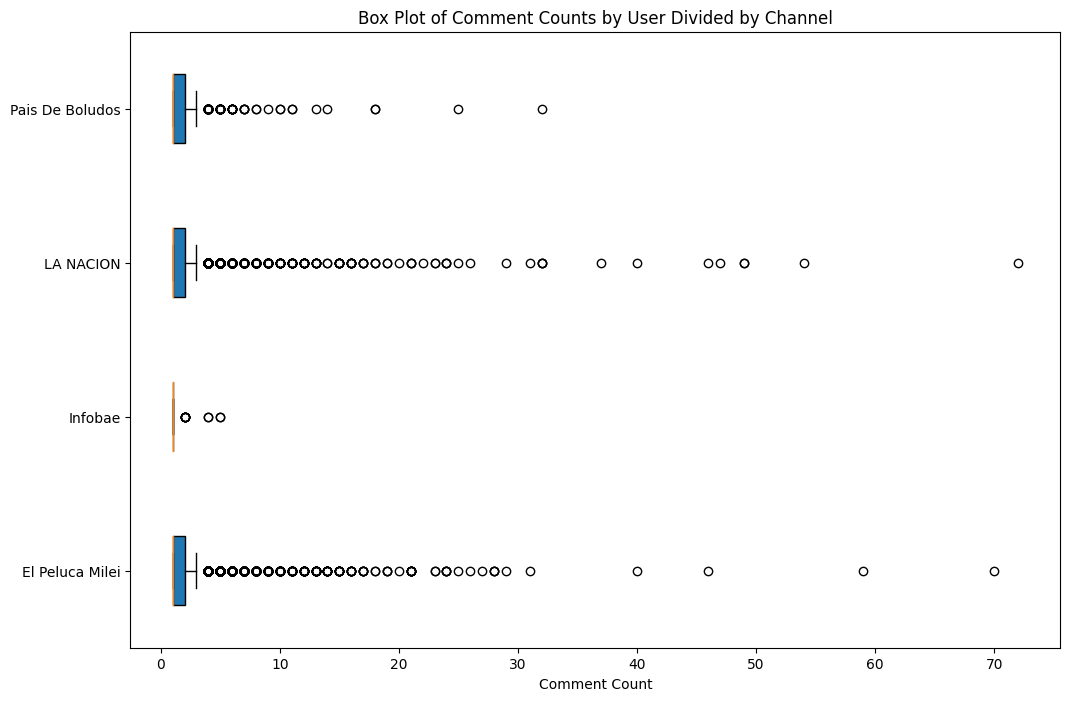

In [84]:
# Counting comments by user and channel
comments_by_user_channel = comentarios_filtered_time.groupby(['channel_title', 'user_id']).size().reset_index(name='comment_count')

# Preparing data for box plots
data_to_plot = [comments_by_user_channel[comments_by_user_channel['channel_title'] == channel]['comment_count'] for channel in comments_by_user_channel['channel_title'].unique()]

# Plotting the box plots without outliers
plt.figure(figsize=(12, 8))
plt.boxplot(data_to_plot, vert=False, patch_artist=True, labels=comments_by_user_channel['channel_title'].unique())
plt.xlabel('Comment Count')
plt.title('Box Plot of Comment Counts by User Divided by Channel')
plt.show()

In [92]:
repeated_comments = comentarios_filtered_time.groupby('comment').size().reset_index(name='comment_count')

repeated_comments_ordered = repeated_comments.sort_values(by='comment_count', ascending=False)
repeated_comments_ordered.head(10)

,comment,comment_count
53111,❤,88
44816,VLLC,41
53224,❤❤❤,38
54003,😂,36
54167,😂😂😂😂,29
46460,Viva la libertad carajo,27
19359,Grande Milei,25
54093,😂😂😂,24
53277,❤❤❤❤❤,22
53254,❤❤❤❤,22


In [93]:
# Define a function to filter out comments that are just emojis or single words
def filter_comments(comment):
    # Check if the comment is a single word
    if len(comment.split()) <= 1:
        # Check if the single word is an emoji (emojis are typically unicode characters beyond the Basic Multilingual Plane)
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"  # emoticons
            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
            u"\U0001F680-\U0001F6FF"  # transport & map symbols
            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
            "]+", flags=re.UNICODE)
        if emoji_pattern.match(comment):
            return False
        else:
            return False
    return True

# Filter the DataFrame
filtered_df = comentarios_filtered_time[comentarios_filtered_time['comment'].apply(filter_comments)]

# Group by comment to count occurrences
repeated_comments = filtered_df.groupby('comment').size().reset_index(name='comment_count')

# Sort by comment_count in descending order
repeated_comments_ordered = repeated_comments.sort_values(by='comment_count', ascending=False)

# Display the top 20 comments
repeated_comments_ordered.head(20)

,comment,comment_count
45650,Viva la libertad carajo,27
18986,Grande Milei,25
37555,RESOLVE LA INSEGURIDAD PELOUDO NO TE VALLAS A ...,17
49503,para mi es un payaso hablan tantp de los rojos...,15
21494,Jhon Perkins confesiones de un Ganster Econòmi...,14
43862,VIVA LA LIBERTAD CARAJO,13
45597,Viva la libertad,12
17616,Fuera kircho!!!!!!!!!!! vaya con su &quot;cond...,11
19292,Grande milei,11
45339,Viva Milei,11


In [32]:
def calculate_users_with_multiple_comments_per_video(df):
    grouped = df.groupby(['channel_title', 'video_title', 'user_id']).size().reset_index(name='comment_count')
    multiple_comments = grouped[grouped['comment_count'] > 1]
    percentage = multiple_comments.groupby('channel_title')['user_id'].nunique() / df.groupby('channel_title')['user_id'].nunique() * 100
    return percentage.reset_index(name='percentage_users_with_multiple_comments_per_video')

# Load the dataframe
df = comentarios_filtered_time

# Calculate the metric
users_with_multiple_comments_per_video = calculate_users_with_multiple_comments_per_video(df)

# Display the result as a table
users_with_multiple_comments_per_video


,channel_title,percentage_users_with_multiple_comments_per_video
0,El Peluca Milei,17.402370
1,Infobae,21.153846
2,LA NACION,22.268693
3,Pais De Boludos,13.993541


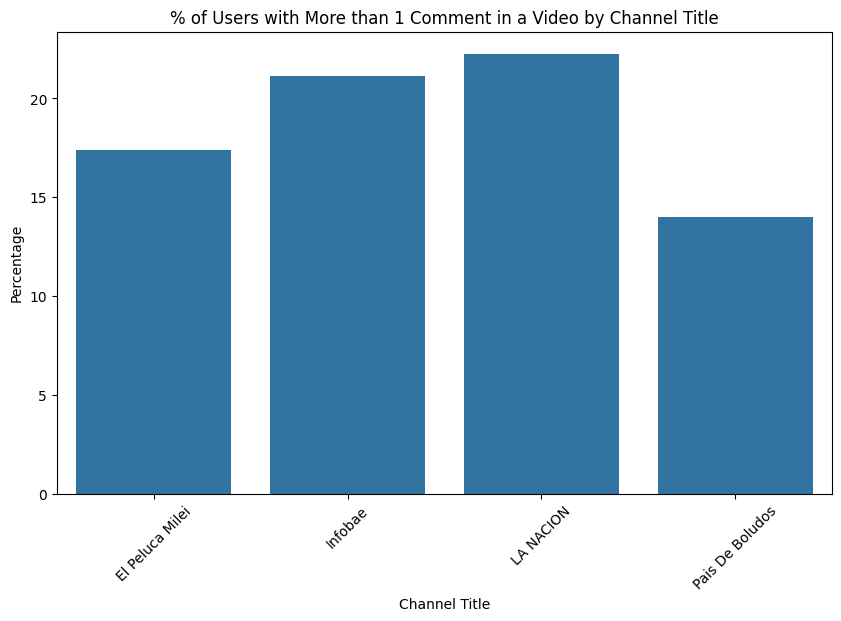

In [33]:
def plot_users_with_multiple_comments_per_video(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='channel_title', y='percentage_users_with_multiple_comments_per_video', data=data)
    plt.title('% of Users with More than 1 Comment in a Video by Channel Title')
    plt.xlabel('Channel Title')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

# Plot the visualization
plot_users_with_multiple_comments_per_video(users_with_multiple_comments_per_video)


In [49]:
def calculate_users_videos_distribution(df):
    # Group by user_id to count distinct videos commented
    video_counts = df.groupby('user_id')['video_title'].nunique().reset_index(name='video_count')
    # Count the number of users for each unique video count
    video_distribution = video_counts['video_count'].value_counts().reset_index()
    video_distribution.columns = ['Qty Videos Commented', 'Qty Users']
    # Calculate the percentage of total users for each unique video count
    video_distribution['% of Total Users'] = (video_distribution['Qty Users'] / video_counts.shape[0]) * 100
    return video_distribution

# Calculate the metric
video_distribution = calculate_users_videos_distribution(df)

# Display the result as a table
video_distribution


,Qty Videos Commented,Qty Users,% of Total Users
0,1,28632,84.219196
1,2,3730,10.971556
2,3,988,2.906139
3,4,360,1.058917
4,5,164,0.482396
5,6,48,0.141189
6,7,31,0.091185
7,8,18,0.052946
8,10,8,0.023531
9,9,8,0.023531


In [37]:
def calculate_users_with_multiple_comments_per_video(df):
    grouped = df.groupby(['channel_title', 'video_title', 'user_id', 'is_top_level_comment']).size().reset_index(name='comment_count')
    multiple_comments = grouped[grouped['comment_count'] > 1]
    percentage = multiple_comments.groupby(['channel_title', 'is_top_level_comment'])['user_id'].nunique() / df.groupby(['channel_title', 'is_top_level_comment'])['user_id'].nunique() * 100
    return percentage.reset_index(name='percentage_users_with_multiple_comments_per_video')

# Load the dataframe
df = comentarios_filtered_time

# Calculate the metric
users_with_multiple_comments_per_video = calculate_users_with_multiple_comments_per_video(df)


In [36]:
def calculate_users_with_multiple_videos_commented(df):
    grouped = df.groupby(['channel_title', 'user_id'])['video_title'].nunique().reset_index(name='video_count')
    multiple_videos = grouped[grouped['video_count'] > 1]
    percentage = multiple_videos.groupby('channel_title')['user_id'].nunique() / df.groupby('channel_title')['user_id'].nunique() * 100
    return percentage.reset_index(name='percentage_users_with_multiple_videos_commented')

# Calculate the metric
users_with_multiple_videos_commented = calculate_users_with_multiple_videos_commented(df)

# Display the result as a table
users_with_multiple_videos_commented


,channel_title,percentage_users_with_multiple_videos_commented
0,El Peluca Milei,12.883845
1,Infobae,NaN
2,LA NACION,11.741304
3,Pais De Boludos,18.030140


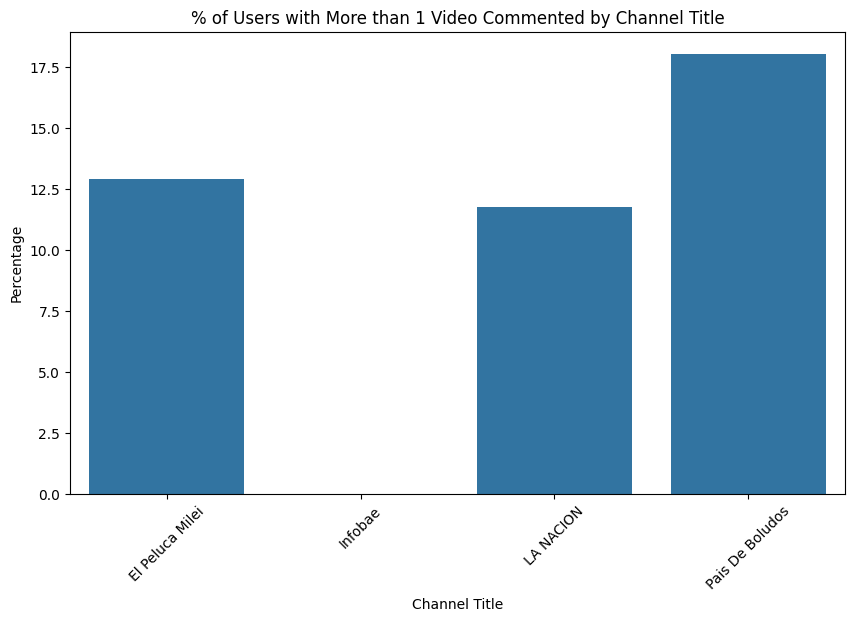

In [41]:
def plot_users_with_multiple_videos_commented(data):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='channel_title', y='percentage_users_with_multiple_videos_commented', data=data)
    plt.title('% of Users with More than 1 Video Commented by Channel Title')
    plt.xlabel('Channel Title')
    plt.ylabel('Percentage')
    plt.xticks(rotation=45)
    plt.show()

# Plot the visualization
plot_users_with_multiple_videos_commented(users_with_multiple_videos_commented)


In [48]:
def calculate_users_channels_distribution(df):
    # Group by user_id to count distinct channels commented
    channel_counts = df.groupby('user_id')['channel_title'].nunique().reset_index(name='channel_count')
    # Count the number of users for each unique channel count
    channel_distribution = channel_counts['channel_count'].value_counts().reset_index()
    channel_distribution.columns = ['Qty Channels Commented', 'Qty Users']
    # Calculate the percentage of total users for each unique channel count
    channel_distribution['% of Total Users'] = (channel_distribution['Qty Users'] / channel_counts.shape[0]) * 100
    return channel_distribution

# Calculate the metric
channel_distribution = calculate_users_channels_distribution(df)

# Display the result as a table
channel_distribution


,Qty Channels Commented,Qty Users,% of Total Users
0,1,32324,95.078978
1,2,1662,4.888667
2,3,11,0.032356


In [27]:
# Group by date for comments
comments_by_date = comentarios_filtered_time.groupby(comentarios_filtered_time['comment_time'].dt.date).size()

# Group by date for video publications
publications_by_date = comentarios_filtered_time.groupby(comentarios_filtered_time['video_published_at'].dt.date).size()


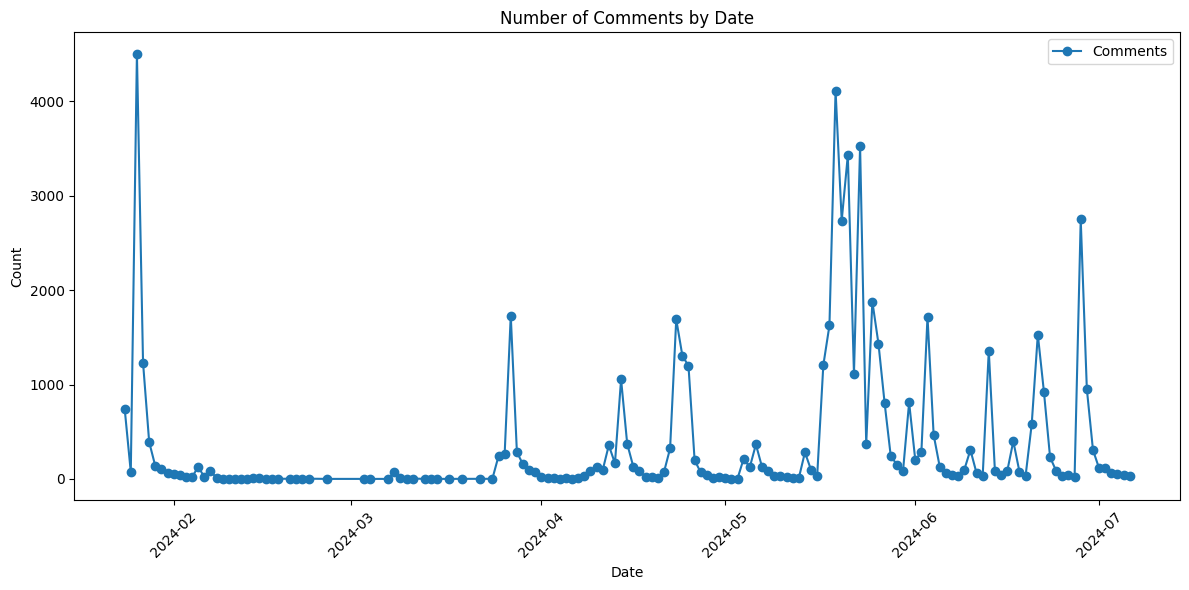

In [28]:
# Plotting
plt.figure(figsize=(12, 6))

plt.plot(comments_by_date.index, comments_by_date.values, label='Comments', marker='o')
#plt.plot(publications_by_date.index, publications_by_date.values, label='Publications', marker='s')

plt.title('Number of Comments by Date')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()

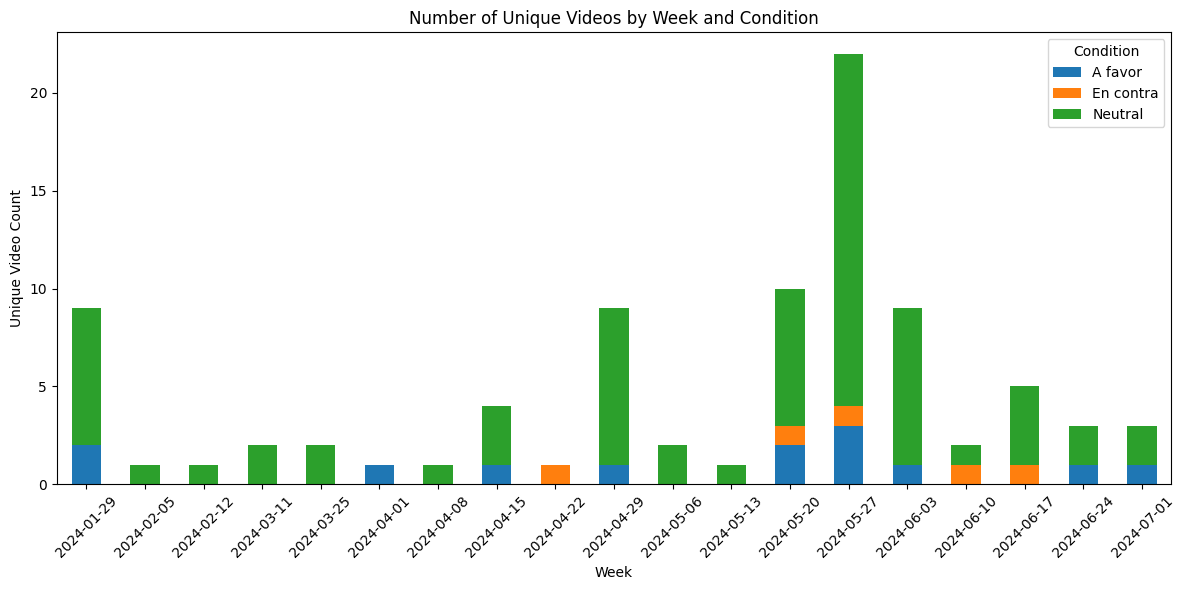

In [109]:
# Format the week dates to show only the day part
comments_by_week_and_condition['video_published_at'] = comments_by_week_and_condition['video_published_at'].dt.strftime('%Y-%m-%d')


# Pivot the data to have condiciones_cuenta as columns
pivot_table = comments_by_week_and_condition.pivot(index='video_published_at', columns='condiciones_cuenta', values='unique_video_count').fillna(0)


# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Unique Videos by Week and Condition')
plt.xlabel('Week')
plt.ylabel('Unique Video Count')
plt.xticks(rotation=45)
plt.legend(title='Condition')

plt.tight_layout()
plt.show()

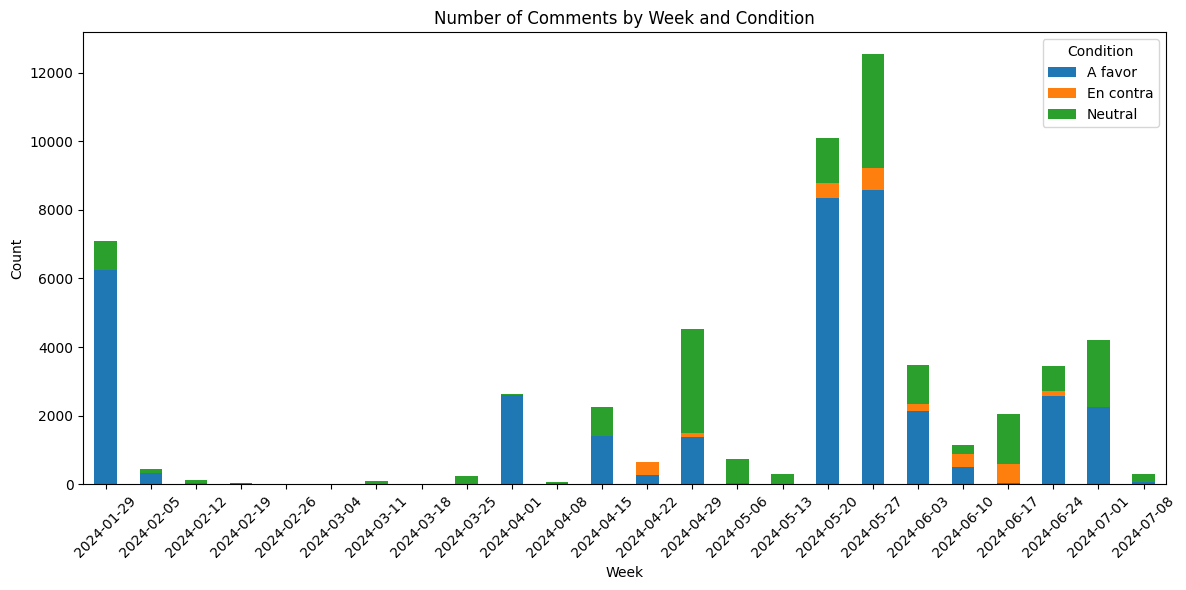

In [106]:
# Group by week and condiciones_cuenta
comments_by_week_and_condition = comentarios_filtered_time.groupby([pd.Grouper(key='comment_time', freq='W-MON'), 'condiciones_cuenta']).size().reset_index(name='count')

# Format the week dates to show only the day part
comments_by_week_and_condition['comment_time'] = comments_by_week_and_condition['comment_time'].dt.strftime('%Y-%m-%d')

# Pivot the data to have condiciones_cuenta as columns
pivot_table = comments_by_week_and_condition.pivot(index='comment_time', columns='condiciones_cuenta', values='count').fillna(0)

# Plotting
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))

plt.title('Number of Comments by Week and Condition')
plt.xlabel('Week')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Condition')

plt.tight_layout()
plt.show()